In [1]:
import csv, math
from math import exp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rc('font', size=20) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=20) #fontsize of the y tick labels
plt.rc('legend', fontsize=20) #fontsize of the legend

In [2]:
# Calculate the percentage error between two lists of data
def pe(ls1, ls2):
    ls1 = ls1[0].tolist()
    ls2 = ls2[0].tolist()
    if len(ls1) != len(ls2):
        print("Error: the input lists are of different length!")
        return 0
    else:
        return 100*abs(sum(ls1)-sum(ls2))/sum(ls2)

In [3]:
meal_profile_suffix = 'extreme_10'

In [4]:
G = pd.read_csv('../data/pid_bergman_SEAL_G_'+meal_profile_suffix+'.csv', header=None)
X = pd.read_csv('../data/pid_bergman_SEAL_X_'+meal_profile_suffix+'.csv', header=None)
I = pd.read_csv('../data/pid_bergman_SEAL_I_'+meal_profile_suffix+'.csv', header=None)
U = pd.read_csv('../data/pid_bergman_SEAL_U_'+meal_profile_suffix+'.csv', header=None)
# D = pd.read_csv('../data/meal_profile_'+meal_profile_suffix+'.csv', header=None)
D = pd.read_csv('../data/testProfile.csv', header=None)
G_plain = pd.read_csv('../data/pid_bergman_plaintext_G_'+meal_profile_suffix+'.csv', header=None)
X_plain = pd.read_csv('../data/pid_bergman_plaintext_X_'+meal_profile_suffix+'.csv', header=None)
I_plain = pd.read_csv('../data/pid_bergman_plaintext_I_'+meal_profile_suffix+'.csv', header=None)
U_plain = pd.read_csv('../data/pid_bergman_plaintext_U_'+meal_profile_suffix+'.csv', header=None)

In [5]:
G = G[2:]
X = X[2:]
I = I[2:]
G_plain = G_plain[2:]
X_plain = X_plain[2:]
I_plain = I_plain[2:]
tend = len(D)
tspan = [i for i in range(tend)]
# Set the thresholds
glucose_high = 8.3
glucose_low = 3.9

In [6]:
G_error = pe(G, G_plain)
X_error = pe(X, X_plain)
I_error = pe(I, I_plain)
U_error = pe(U, U_plain)

print("Percentage error between encrypted G and plaintext G: ", G_error , "%")
print("Percentage error between encrypted X and plaintext X: ", X_error, "%")
print("Percentage error between encrypted I and plaintext I: ", I_error, "%")
print("Percentage error between encrypted U and plaintext U: ", U_error, "%")

Percentage error between encrypted G and plaintext G:  0.000421612603277788 %
Percentage error between encrypted X and plaintext X:  4.62920235634208e-07 %
Percentage error between encrypted I and plaintext I:  0.002286062389400485 %
Percentage error between encrypted U and plaintext U:  0.0022874489847525717 %


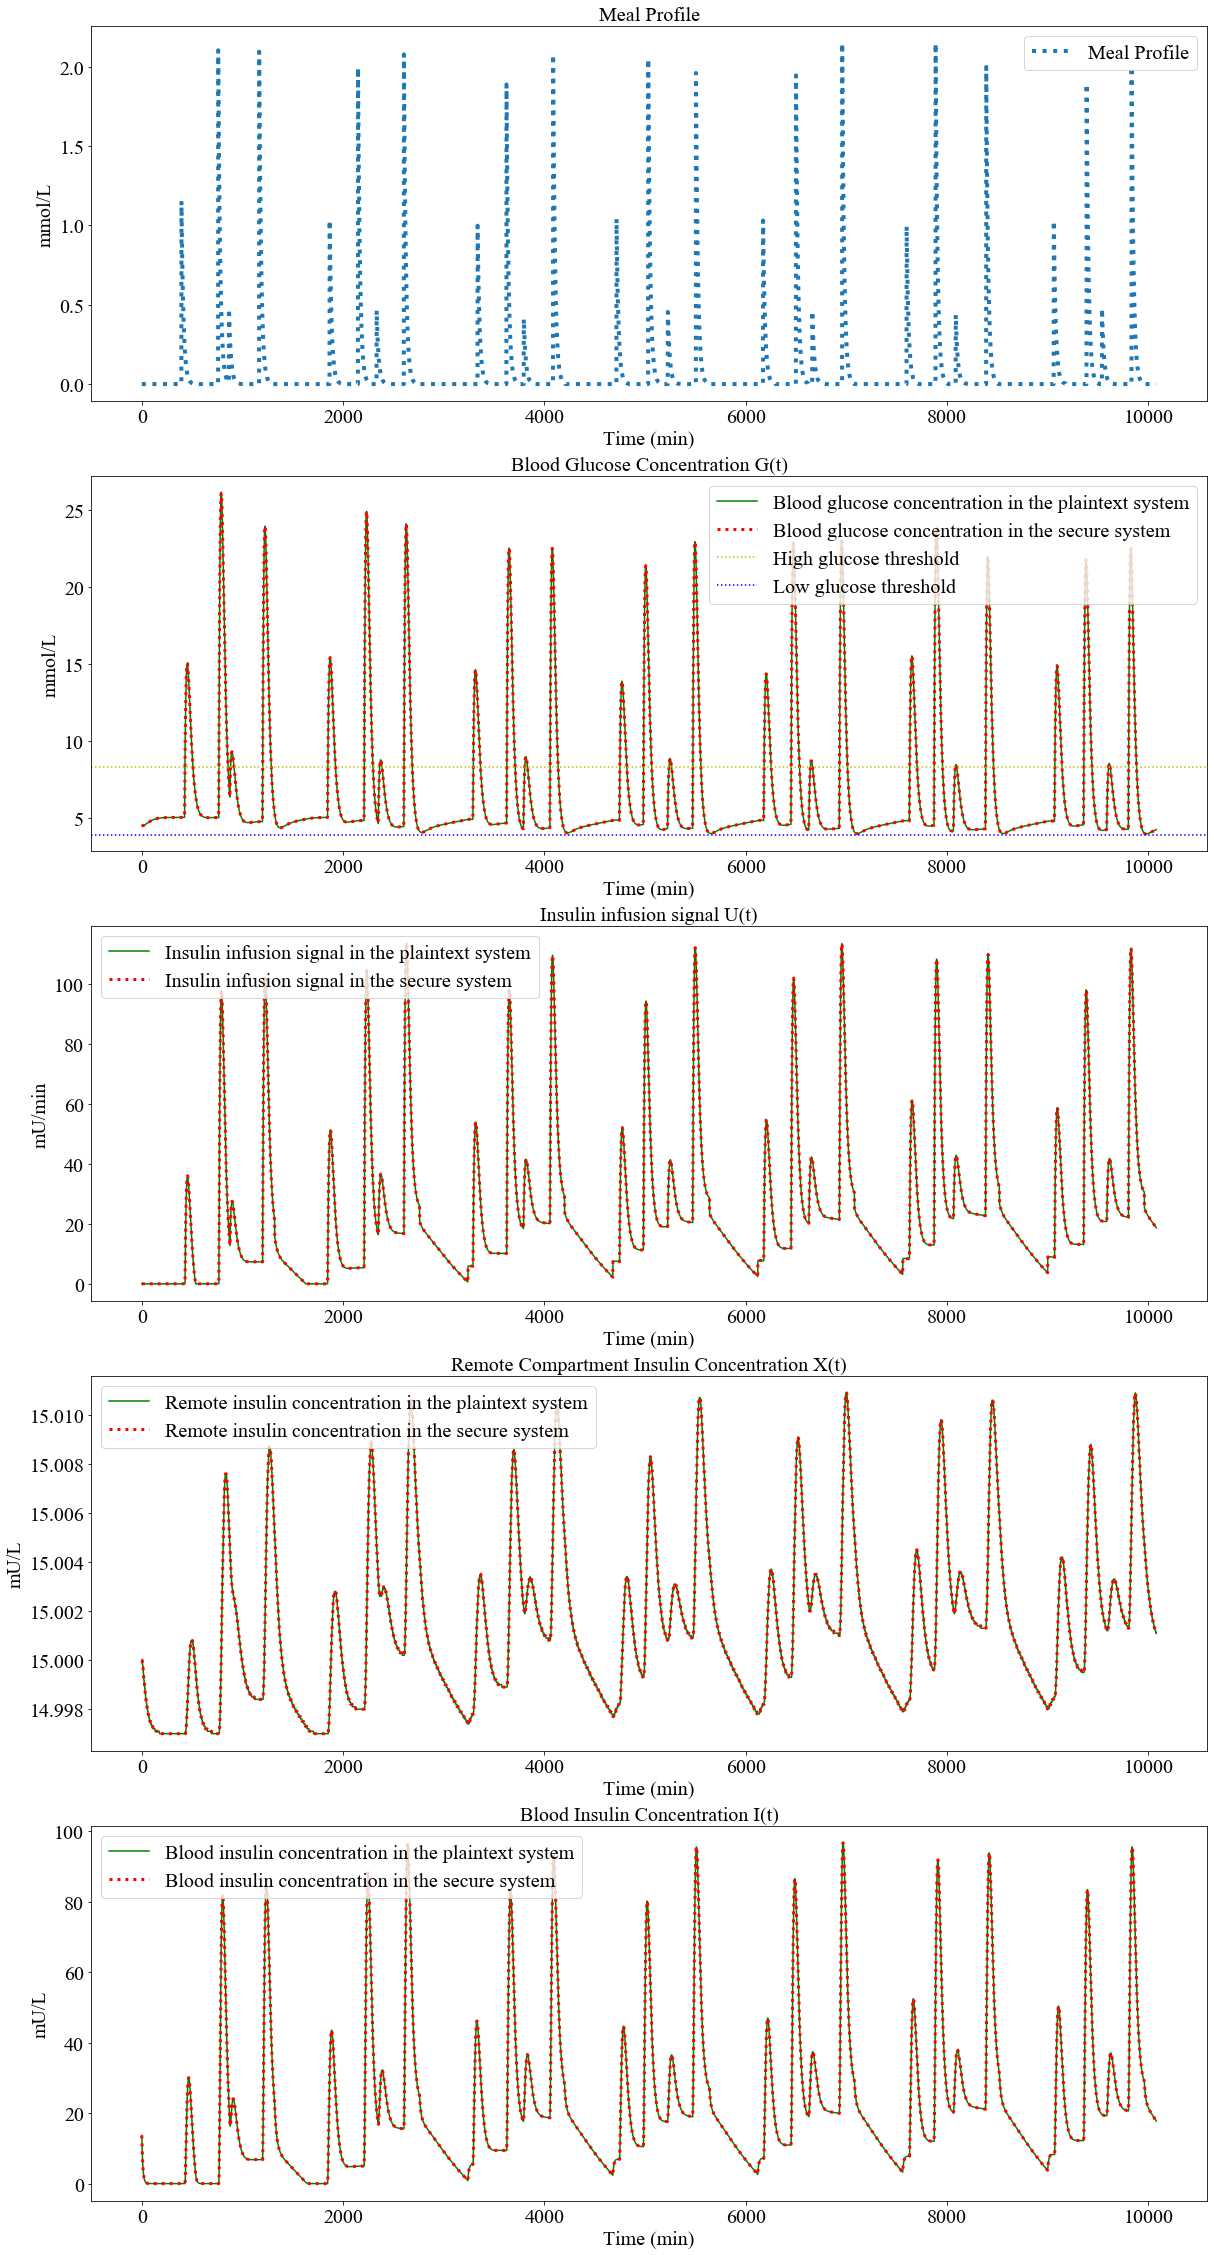

In [7]:
plt.figure(figsize=(20, 40))
plt.subplot(5,1,1)
plt.plot(tspan, D, label='Meal Profile',linestyle = ':',linewidth = 4)
plt.legend()
plt.xlabel('Time (min)')
plt.ylabel('mmol/L')
plt.title('Meal Profile')

plt.subplot(5,1,2)
plt.plot(tspan,G_plain, label='Blood glucose concentration in the plaintext system', color = 'g')
plt.plot(tspan,G, label='Blood glucose concentration in the secure system', color = 'r', linestyle = ':',linewidth = 3)
plt.axhline(y = glucose_high, color = 'y', linestyle = ':', label='High glucose threshold')
plt.axhline(y = glucose_low, color = 'b', linestyle = ':', label='Low glucose threshold')
plt.legend()
plt.xlabel('Time (min)')
plt.ylabel('mmol/L')
plt.title('Blood Glucose Concentration G(t)')

plt.subplot(5,1,3)
plt.plot(tspan, U_plain, label='Insulin infusion signal in the plaintext system', color = 'g')
plt.plot(tspan, U, label='Insulin infusion signal in the secure system', color = 'r', linestyle = ':',linewidth = 3)

plt.legend()
plt.xlabel('Time (min)')
plt.ylabel('mU/min')
plt.title('Insulin infusion signal U(t)')

plt.subplot(5,1,4)
plt.plot(tspan, X_plain, label='Remote insulin concentration in the plaintext system', color = 'g')
plt.plot(tspan, X, label='Remote insulin concentration in the secure system', color = 'r', linestyle = ':',linewidth = 3)

plt.legend()
plt.xlabel('Time (min)')
plt.ylabel('mU/L')
plt.title('Remote Compartment Insulin Concentration X(t)')

plt.subplot(5,1,5)
plt.plot(tspan, I_plain, label='Blood insulin concentration in the plaintext system', color = 'g')
plt.plot(tspan, I, label='Blood insulin concentration in the secure system', color = 'r', linestyle = ':',linewidth = 3)
plt.legend()
plt.xlabel('Time (min)')
plt.ylabel('mU/L')
plt.title('Blood Insulin Concentration I(t)')

plt.savefig('../graphs/blood_glucose_control_'+meal_profile_suffix+'.pdf', format='pdf', bbox_inches='tight')

plt.show()